In [2]:
#Part 1 Data preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:,1:2].values


In [5]:
#Feature scaling
#Standardisation xstand = ((x-mean(x))/standard deviation(x))
#Normalisation xnorm = ((x-min(x))/(max(x)-min(x)))
#If sigmoid is activation function in the output layer recommended Normalisation
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)


In [7]:
#Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
#total datasets in traning_set_scaled
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    #stock price at t+1
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [19]:
#Building the LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#Initializing the RNN with stacked LSTM
regressor = Sequential()
#Adding the first LSTM, Dropout and regularization
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer 
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the third LSTM layer
regressor.add(LSTM(units=50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the fourth LSTM layer
regressor.add(LSTM(units=50, return_sequences = False))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units=1))

#compile the RNN, rmsprop is recommended but we are using adam
#It's not a classification problem we will use MSE. usually for regression problem MSE is the choice
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

#Fitting the RNN with training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 22s 19ms/step - loss: 0.0484
Epoch 2/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0070
Epoch 3/100
1198/1198 [==============================] - 20s 16ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0056
Epoch 5/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0049
Epoch 7/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 19s 15ms/step - loss: 0.0042
Epoch 10/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 19s 16ms/step - loss: 0.0039
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 18s 15ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 17s 15ms/step - loss: 0.0015


In [23]:
#Making the predictions and visualising the results
#Getting the real stock price for Google for 2017
# Importing training set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

#Getting the predicted stock price for 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
#total datasets in test_set_scaled
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
#Reshaping data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict_stock_price = regressor.predict(X_test)
predict_stock_price = sc.inverse_transform(predict_stock_price)
print("real stock price:", real_stock_price)
print("predicted stock price:", predict_stock_price)

real stock price: [[ 778.81]
 [ 788.36]
 [ 786.08]
 [ 795.26]
 [ 806.4 ]
 [ 807.86]
 [ 805.  ]
 [ 807.14]
 [ 807.48]
 [ 807.08]
 [ 805.81]
 [ 805.12]
 [ 806.91]
 [ 807.25]
 [ 822.3 ]
 [ 829.62]
 [ 837.81]
 [ 834.71]
 [ 814.66]
 [ 796.86]]
predicted stock price: [[ 797.56634521]
 [ 794.42871094]
 [ 795.71881104]
 [ 798.61346436]
 [ 802.56408691]
 [ 808.65332031]
 [ 813.80877686]
 [ 814.7913208 ]
 [ 814.05114746]
 [ 814.14807129]
 [ 815.14862061]
 [ 815.63269043]
 [ 815.20471191]
 [ 815.25756836]
 [ 816.07336426]
 [ 821.62982178]
 [ 829.94317627]
 [ 837.51220703]
 [ 839.75732422]
 [ 832.2532959 ]]


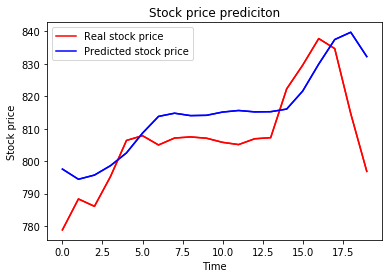

In [26]:
#visualizing the results
plt.plot(real_stock_price, color ='red', label = 'Real stock price')
plt.plot(predict_stock_price, color ='blue', label = 'Predicted stock price')
plt.title('Stock price prediciton')
plt.xlabel('Time')
plt.ylabel('Stock price')
plt.legend()
plt.show()